In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Some random PHQ score set

In [2]:
df = pd.read_csv('PHQ9 Scores.csv')

In [5]:
df.head()

,Patient ID,First PHQ Score,First PHQ Score Date,Last PHQ Score,Last PHQ Score Date,Unnamed: 5,Follow-up Time
0,600001,10,11/17/15,4,1/26/16,NaN,69
1,600002,13,11/16/15,11,5/3/16,NaN,167
2,600003,15,11/17/15,3,3/31/16,NaN,134
3,600005,7,11/30/15,9,5/18/16,NaN,168
4,600006,19,11/18/15,11,4/5/16,NaN,137


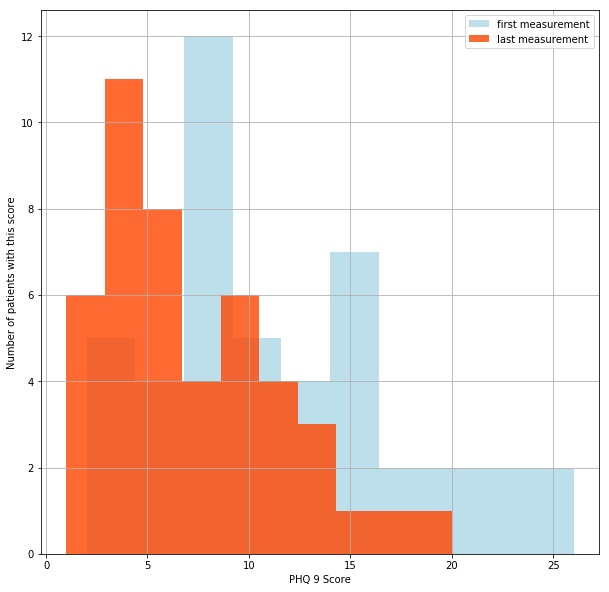

In [10]:
f, a = plt.subplots()
f.set_size_inches(10, 10)

num_bins = 10
df['First PHQ Score'].hist(bins=num_bins, label='first measurement', ax=a, color='lightblue', alpha=0.8)
df['Last PHQ Score'].hist(bins=num_bins, label='last measurement', ax=a, color='orangered', alpha=0.8)
a.set_xlabel('PHQ 9 Score')
a.set_ylabel('Number of patients with this score')
a.legend()

# Cars in a circle

In [84]:
import random

# plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# I know how to plot very easily with pandas so I use that
import pandas as pd
# mostly a matter of convenience for mean and std
import numpy as np

## Initial scratch

In [1]:
M = 5
N = 10
T = 20
if M > N:
    raise ValueError('must have fewer objects than spots')

In [8]:
# initialize the cars to first M positions
positions = {m: m for m in range(M)}
# keep track of an occupation dict that tells you if position X on the circle is occupied (1) or not (0)
occupation_dict = {n: 1 if n in positions.values() else 0 for n in range(N)}

In [15]:
def forward_position_free(object_num):
    '''
    Given an object number (i.e. a car identifier), see if the position ahead of it is free
    '''
    object_pos = positions[object_num]
    # incremen the position by one and check if it is free, but don't forget to do modulo the circle size
    occupation_of_next_pos = occupation_dict[(object_pos + 1) % N]
    if occupation_of_next_pos == 1:
        return False
    else:
        return True

In [18]:
[forward_position_free(x) for x in range(M)]

[False, False, False, False, True]

## Codify into class

In [72]:
class CircularRoad():
    # TODO(dstone): put in error catching for illegal moves, even though they shouldn't happen
    def __init__(self, M=5, N=10, T=20, verbose=False):
        self.M = M
        self.N = N
        self.T = T
        self.verbose = verbose

        # initialize the cars to first M positions
        self.positions = {m: m for m in range(self.M)}
        # keep track of an occupation dict that tells you if position X on the circle is occupied (1) or not (0)
        self.occupations = {n: 1 if n in self.positions.values() else 0 for n in range(self.N)}
        
    def forward_position_free(self, object_num):
        '''
        Given an object number (i.e. a car identifier), see if the position ahead of it is free
        '''
        object_pos = self.positions[object_num]
        # incremen the position by one and check if it is free, but don't forget to do modulo the circle size
        occupation_of_next_pos = self.occupations[(object_pos + 1) % self.N]
        if occupation_of_next_pos == 1:
            return False
        else:
            return True
        
    def get_movable_objects(self):
        '''
        Return all object identifiers that have cells ahead of them that are free
        '''
        return [x for x in range(self.M) if self.forward_position_free(x)]
        
    def move_object(self, object_num):
        '''
        Edits positions_dict and occupation dict in place!
        '''
        old_pos = self.positions[object_num]
        # be careful to check modulo circle size
        new_pos = (old_pos + 1) % self.N
        # move to new position
        self.positions[object_num] = new_pos
        # the old space is now empty, the new space is now occupied
        self.occupations[old_pos], self.occupations[new_pos] = 0, 1
        if self.verbose:
            print('[debug] Current positions are:\n\t{pos}'.format(pos=self.positions))
        
    def advance_one_round(self):
        '''
        Find objects eligble for moving, choose one of them at random, and move it. 
        Update the positions and occupations configurations after doing so
        '''
        # choose a position at random
        if self.verbose:
            print('[debug] Advancing round, current positions are:\n\t{pos}'.format(pos=self.positions))
            print('[debug] Current occupations are:\n\t{occ}'.format(occ=self.occupations))
        movable_objs = self.get_movable_objects()
        if self.verbose:
            print('[debug] Current objects that can move are: {objs}'.format(objs=movable_objs))
        obj_to_move = random.choice(movable_objs)
        if self.verbose:
            print('[debug] Objects randomly chosent to move: {obj}'.format(obj=obj_to_move))
        self.move_object(obj_to_move)
        if self.verbose:
            print('[debug] Round advanced, new positions are:\n\t{pos}'.format(pos=self.positions))
            print('[debug] New occupations are:\n\t{occ}'.format(occ=self.occupations))
    
    def get_position_average(self):
        '''
        Return the average of object positions
        '''
        return np.mean([x for x in cr.positions.values()])
    
    def get_position_std(self):
        '''
        Return the std. dev. of object positions
        '''
        return np.std([x for x in cr.positions.values()])
    
    def run(self):
        for i in range(self.T):
            self.advance_one_round()
            print('Round {i}, average positions: {avg:.3f} +/- {std:.3f}'.format(i=i, avg=self.get_position_average(), std=self.get_position_std()))

In [80]:
cr = CircularRoad(verbose=False, T=20)

In [74]:
cr.get_movable_objects()

[4]

In [75]:
cr.advance_one_round()

[debug] Advancing round, current positions are:
	{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
[debug] Current occupations are:
	{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
[debug] Current objects that can move are: [4]
[debug] Objects randomly chosent to move: 4
[debug] Current positions are:
	{0: 0, 1: 1, 2: 2, 3: 3, 4: 5}
[debug] Round advanced, new positions are:
	{0: 0, 1: 1, 2: 2, 3: 3, 4: 5}
[debug] New occupations are:
	{0: 1, 1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


In [76]:
cr.get_movable_objects()

[3, 4]

In [87]:
# look here for an example run
cr = CircularRoad(verbose=False, T=20)
cr.run()

Round 0, average positions: 2.200 +/- 1.720
Round 1, average positions: 2.400 +/- 1.855
Round 2, average positions: 2.600 +/- 2.154
Round 3, average positions: 2.800 +/- 2.315
Round 4, average positions: 3.000 +/- 2.280
Round 5, average positions: 3.200 +/- 2.135
Round 6, average positions: 3.400 +/- 2.154
Round 7, average positions: 3.600 +/- 2.059
Round 8, average positions: 3.800 +/- 2.315
Round 9, average positions: 4.000 +/- 2.449
Round 10, average positions: 4.200 +/- 2.135
Round 11, average positions: 4.400 +/- 2.154
Round 12, average positions: 4.600 +/- 2.059
Round 13, average positions: 4.800 +/- 1.720
Round 14, average positions: 5.000 +/- 1.414
Round 15, average positions: 5.200 +/- 1.720
Round 16, average positions: 5.400 +/- 2.059
Round 17, average positions: 3.600 +/- 2.059
Round 18, average positions: 3.800 +/- 1.720
Round 19, average positions: 4.000 +/- 2.000


## Collect data and plot

In [ ]:
cr.get_position_average()

In [89]:
df_positions = pd.DataFrame(columns=['round', 'position_avg', 'position_std'])
T = 1000
N = 10
M = 5
cr = CircularRoad(N=N, M=M) # don't need to specify T, we can do it manually
for i in range(T):
    cr.advance_one_round()
    df_positions.loc[i] = [i, cr.get_position_average(), cr.get_position_std()]

In [88]:
# these are what we expect from a uniform distribution
# https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)
_EXPECTED_AVERAGE = (N-0)/2
_EXPECTED_STD = np.sqrt((N-0)/12)

In [86]:
df_positions

,round,position avg,position std
0,0.0,2.2,1.720465
1,1.0,2.4,1.854724
2,2.0,2.6,2.154066
3,3.0,2.8,2.135416
4,4.0,3.0,2.000000
5,5.0,3.2,1.720465
6,6.0,3.4,2.059126
7,7.0,3.6,2.154066
8,8.0,3.8,2.315167
9,9.0,4.0,2.280351


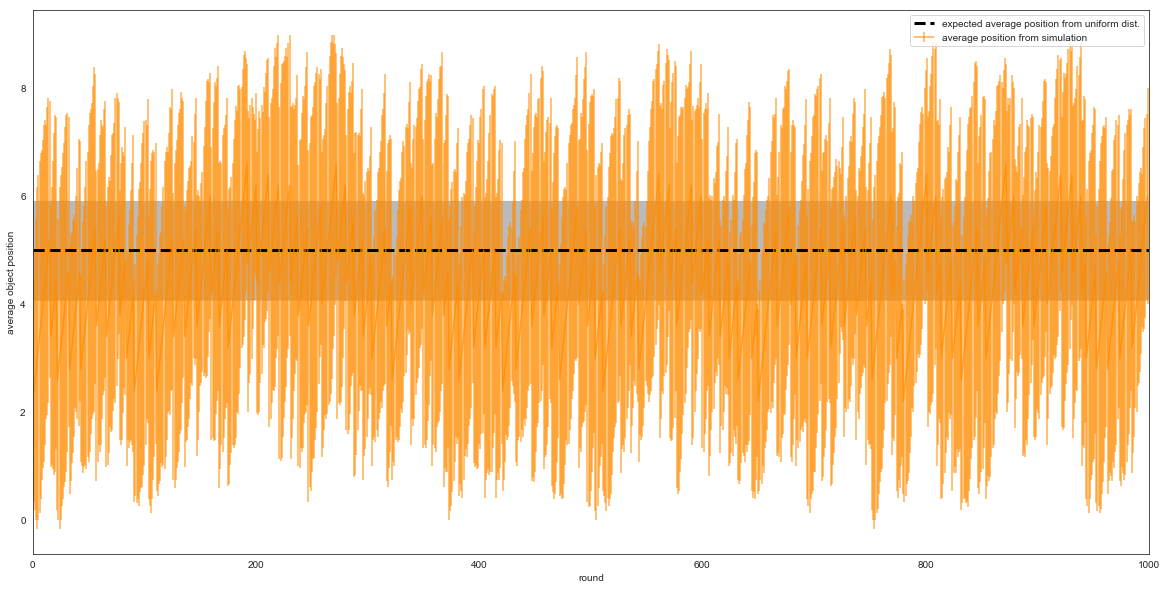

In [100]:
f, a = plt.subplots(figsize=(20,10))
sns.set_style('white')

plt.errorbar(x=df_positions['round'].values,
             y=df_positions['position_avg'].values,
             yerr=df_positions['position_std'].values,
             color='darkorange',
             capthick=2,
             label='average position from simulation',
             alpha=0.7
            )

# plot the expected lines
a.set_xlim([0, T])
plt.plot([0, T], [_EXPECTED_AVERAGE, _EXPECTED_AVERAGE], ls='--', lw=3, color='black', label='expected average position from uniform dist.')

lower_expected_std, upper_expected_std = _EXPECTED_AVERAGE - _EXPECTED_STD, _EXPECTED_AVERAGE + _EXPECTED_STD
a.fill_between(df_positions['round'].values, lower_expected_std, upper_expected_std, color='darkgray', alpha=0.8)

a.set_xlabel('round')
a.set_ylabel('average object position')
a.legend()